In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.vision import *
from fastai.metrics import error_rate

import pathlib

In [3]:
# bs = 64
bs = 16   # uncomment this line if you run out of memory even after clicking Kernel->Restart

In [4]:
path = pathlib.Path('./justice_league')

path.ls()

[PosixPath('justice_league/images'), PosixPath('justice_league/labels.txt')]

In [5]:
path_img = path/'images'

In [6]:
fnames = get_image_files(path_img)
fnames[:5]

[PosixPath('justice_league/images/The Flash: The Flash #105 Original (1958-12-23).jpg'),
 PosixPath('justice_league/images/Batman: Batman #659 Direct Sales (2006-11-29).jpg'),
 PosixPath('justice_league/images/Detective Comics: Detective Comics #455 Original (1975-10-28).jpg'),
 PosixPath('justice_league/images/The Flash: The Flash #46 Looney Tunes Variant Cover (2015-11-25).jpg'),
 PosixPath('justice_league/images/The Flash: The Flash #171 Original (1967-04-18).jpg')]

In [34]:
base_ratio = 80
"{} x {}".format(base_ratio * (600 / 400), base_ratio)

'120.0 x 80'

In [35]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="torch.nn.functional")

data = ImageDataBunch.from_csv(path=path, 
                               folder="images",
                               csv_labels="labels.txt",
                               fn_col=0,
                               label_col=1,
                               delimiter="\t",
                               label_delim="|",
                               valid_pct=0.2,
                               size=(120, 80))
data

ImageDataBunch;

Train: LabelList (7424 items)
x: ImageList
Image (3, 120, 80),Image (3, 120, 80),Image (3, 120, 80),Image (3, 120, 80),Image (3, 120, 80)
y: MultiCategoryList
Batman,Batman,Superman,Batman,Batman
Path: justice_league;

Valid: LabelList (1856 items)
x: ImageList
Image (3, 120, 80),Image (3, 120, 80),Image (3, 120, 80),Image (3, 120, 80),Image (3, 120, 80)
y: MultiCategoryList
Batman,Green Lantern,Green Lantern,Superman,Green Lantern
Path: justice_league;

Test: None

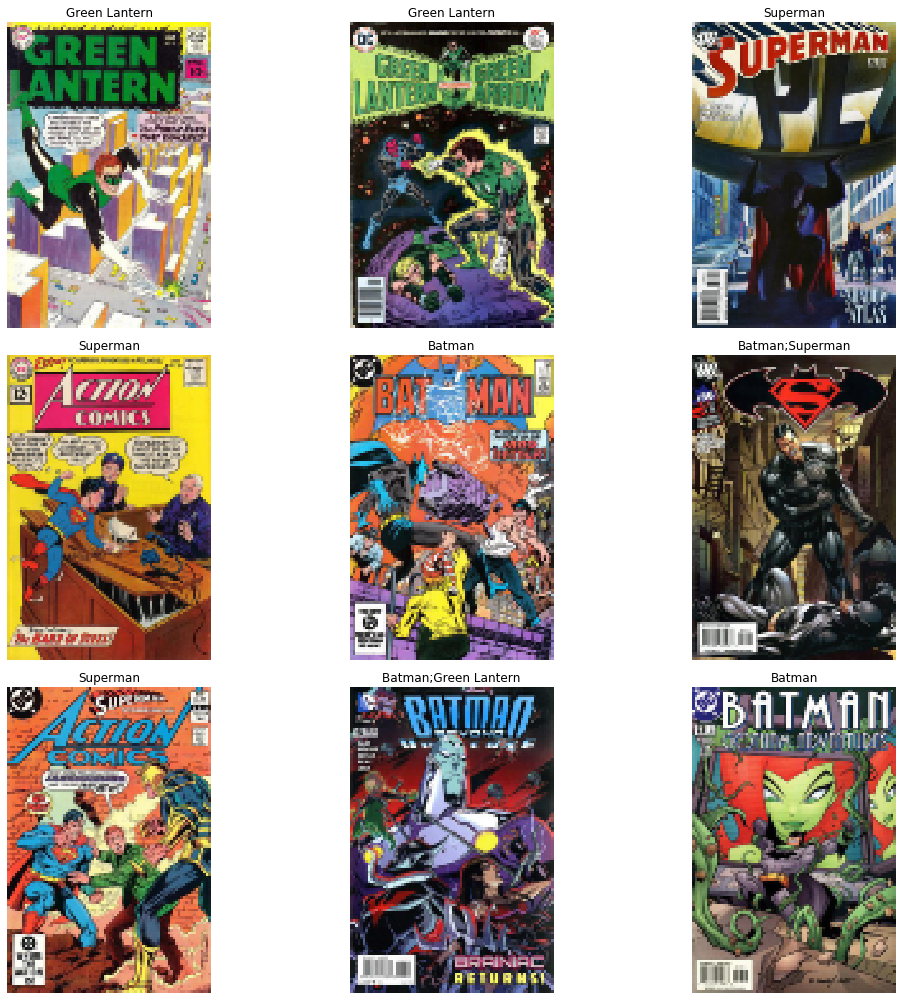

In [36]:
data.show_batch(rows=3, figsize=(16, 14))

In [37]:
print(data.classes)
len(data.classes),data.c

['Aquaman', 'Batman', 'Cyborg', 'Flash', 'Green Lantern', 'Superman', 'Wonder Woman']


(7, 7)

Deep Learning Experiments

1. Resnet 34 (train a comic book specific resnet model)
2. Language Model (create a language model that writes comic book synopses)
3. Style Transfer (create style filters and apply them to covers)
4. Character / Object Detection (detect characters on a cover)
5. GAN ("dream" comic book covers)
6. Joint Probability Synopsis/Cover (given a synopsis, generate a comic book cover)

In [38]:
arch = models.resnet50

In [39]:
acc_02 = partial(accuracy_thresh, thresh=0.2)
f_score = partial(fbeta, thresh=0.2)
learn = cnn_learner(data, arch, metrics=[acc_02, f_score])

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /Users/smacrae/.cache/torch/checkpoints/resnet50-19c8e357.pth
100%|██████████| 97.8M/97.8M [00:55<00:00, 1.85MB/s]


In [40]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


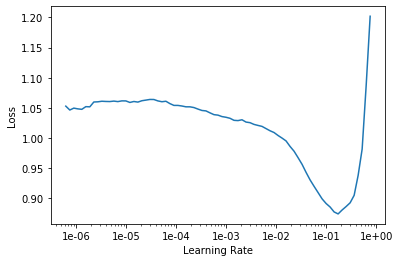

In [41]:
learn.recorder.plot()

In [42]:
lr = 1e-1

In [ ]:
learn.fit_one_cycle(5, slice(lr))

epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time
0,0.454517,0.345616,0.811345,0.716420,15:17
1,0.342108,0.336564,0.855218,0.714962,14:23
2,0.280671,0.257994,0.837208,0.795992,14:26
3,0.214293,0.205927,0.877540,0.850961,16:38


In [ ]:
learn.save("justice-league-stage-1-rn50")

In [ ]:
learn.unfreeze()

In [ ]:
learn.lr_find()
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(5, slice(1e-5, lr/5))

In [ ]:
learn.save('justice-league-stage-2-rn50')